# ALY6050_MOD1Project_Payal_Sharma

## Analysis of a Betting Strategy in Sports

### Problem Statement

The Boston Red Sox and New York Yankees are scheduled to play a best-of-three series, where the first team to win two games emerges as the winner. The series can follow two different sequences:

Game 1 in Boston, Game 2 in New York, and Game 3 (if necessary) in Boston.
Game 1 in New York, Game 2 in Boston, and Game 3 (if necessary) in New York.
The probabilities for each team winning a game are as follows:

The probability of the Red Sox winning at home (Boston) is 0.6.
The probability of the Yankees winning at home (New York) is 0.57.
The betting scenario involves the following stakes:

If the Red Sox win a game, the bettor wins $500.

If the Red Sox lose a game, the bettor loses $520.

The outcomes of the games are assumed to be independent of each other.

### Objective of the Assignment

The assignment is divided into three parts:

Part 1: Analyze the series with the sequence: Boston, New York, and Boston (if necessary).

Part 2: Repeat the analysis with the sequence: New York, Boston, and New York (if necessary).

Part 3: Extend the analysis to a best-of-five series with alternating games, starting in Boston.

### import libraries

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)


### Parameters

In [267]:
p_B_win = 0.6   # Red Sox win at home (Boston)
p_NY_win = 0.57 # Yankees win at home (New York)
win_amount = 500
lose_amount = 520
n_simulations = 10000

### Function to calculate probability for each game

In [270]:

def calculate_probabilities(game_order):
    prob = []
    for game in game_order:
        if game == "B":
            prob.append(p_B_win)
        elif game == "NY":
            prob.append(1 - p_NY_win)
    return prob

### Function to simulate the series

In [273]:

def simulate_series(game_order, wins_needed):
    outcomes = []

    for _ in range(n_simulations):
        games = []
        for game in game_order:
            if game == 'B':
                games.append(np.random.choice(['W', 'L'], p=[p_B_win, 1 - p_B_win]))
            elif game == 'NY':
                games.append(np.random.choice(['W', 'L'], p=[1 - p_NY_win, p_NY_win]))

        red_sox_wins = games.count('W')
        if red_sox_wins >= wins_needed:
            outcomes.append(wins_needed * win_amount)
        else:
            outcomes.append(-wins_needed * lose_amount)
    
    return np.array(outcomes)



    

## Simulate All Three Parts

outcomes_part1 = simulate_series(['B', 'NY', 'B'], wins_needed=2)
print(outcomes_part1)
outcomes_part2 = simulate_series(['NY', 'B', 'NY'], wins_needed=2)
print(outcomes_part2)
outcomes_part3 = simulate_series(['B', 'NY', 'B', 'NY', 'B'], wins_needed=3)
print(outcomes_part3)

[-1040  1000 -1040 ...  1000 -1040  1000]
[-1040  1000 -1040 ... -1040 -1040  1000]
[ 1500 -1560  1500 ...  1500 -1560  1500]


### Function To Calculate Risk Metrics

In [276]:
def calculate_risk_metrics(outcomes, part_title):
    print(f"Calculating for: {part_title}")  # Debugging line
    mean_out = np.mean(outcomes)
    std_out = np.std(outcomes, ddof=1)
    cv_out = std_out / abs(mean_out) if mean_out != 0 else np.inf
    prob_loss = np.mean(outcomes < 0)
    
    print(f"\nRisk and Profitability Analysis - {part_title}:")
    print(f"  Expected Value (Mean): ${mean_out:.2f}")
    print(f"  Standard Deviation (Risk): ${std_out:.2f}")
    print(f"  Coefficient of Variation (Risk per $1 Profit): {cv_out:.2f}")
    print(f"  Probability of Loss: {prob_loss:.2%}")
    
    return {
        'Mean': mean_out,
        'Std Dev': std_out,
        'CV': cv_out,
        'Prob Loss': prob_loss
    }





### Calculate Risk Metrics for All Parts

In [279]:
metrics_part1 = calculate_risk_metrics(outcomes_part1, "Part 1 - B, NY, B")
metrics_part2 = calculate_risk_metrics(outcomes_part2, "Part 2 - NY, B, NY")
metrics_part3 = calculate_risk_metrics(outcomes_part3, "Part 3 - Best of Five")

Calculating for: Part 1 - B, NY, B

Risk and Profitability Analysis - Part 1 - B, NY, B:
  Expected Value (Mean): $124.84
  Standard Deviation (Risk): $1009.71
  Coefficient of Variation (Risk per $1 Profit): 8.09
  Probability of Loss: 42.90%
Calculating for: Part 2 - NY, B, NY

Risk and Profitability Analysis - Part 2 - NY, B, NY:
  Expected Value (Mean): $-61.41
  Standard Deviation (Risk): $1019.21
  Coefficient of Variation (Risk per $1 Profit): 16.60
  Probability of Loss: 52.03%
Calculating for: Part 3 - Best of Five

Risk and Profitability Analysis - Part 3 - Best of Five:
  Expected Value (Mean): $147.17
  Standard Deviation (Risk): $1519.78
  Coefficient of Variation (Risk per $1 Profit): 10.33
  Probability of Loss: 44.21%


### Chi-squared Goodness of Fit Test

In [282]:
def chi_squared_test(outcomes, part_title):
    unique, counts = np.unique(outcomes, return_counts=True)
    observed = counts
    expected = np.full_like(observed, n_simulations / len(observed))
    
    chi2_stat, p_val = stats.chisquare(observed, f_exp=expected)
    
    print(f"\nChi-squared Goodness of Fit - {part_title}:")
    print(f"  Chi-squared Statistic: {chi2_stat:.4f}")
    print(f"  p-value: {p_val:.4f}")
    
    return chi2_stat, p_val

### Perform Chi-squared Test for All Parts

In [285]:
chi_squared_test(outcomes_part1, "Part 1 - B, NY, B")
chi_squared_test(outcomes_part2, "Part 2 - NY, B, NY")
chi_squared_test(outcomes_part3, "Part 3 - Best of Five")


Chi-squared Goodness of Fit - Part 1 - B, NY, B:
  Chi-squared Statistic: 201.6400
  p-value: 0.0000

Chi-squared Goodness of Fit - Part 2 - NY, B, NY:
  Chi-squared Statistic: 16.4836
  p-value: 0.0000

Chi-squared Goodness of Fit - Part 3 - Best of Five:
  Chi-squared Statistic: 134.0964
  p-value: 0.0000


(134.0964, 5.20460549713335e-31)

### Visualization - Histograms of Net Winnings

### Part 1: Boston, New York, Boston

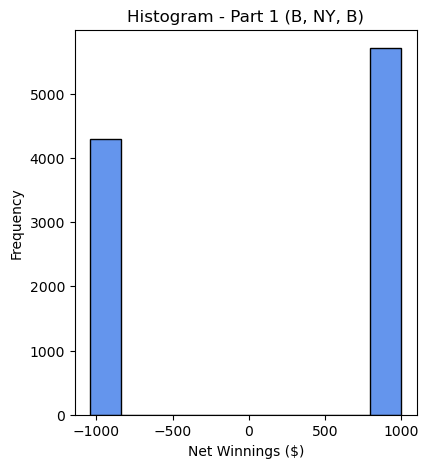

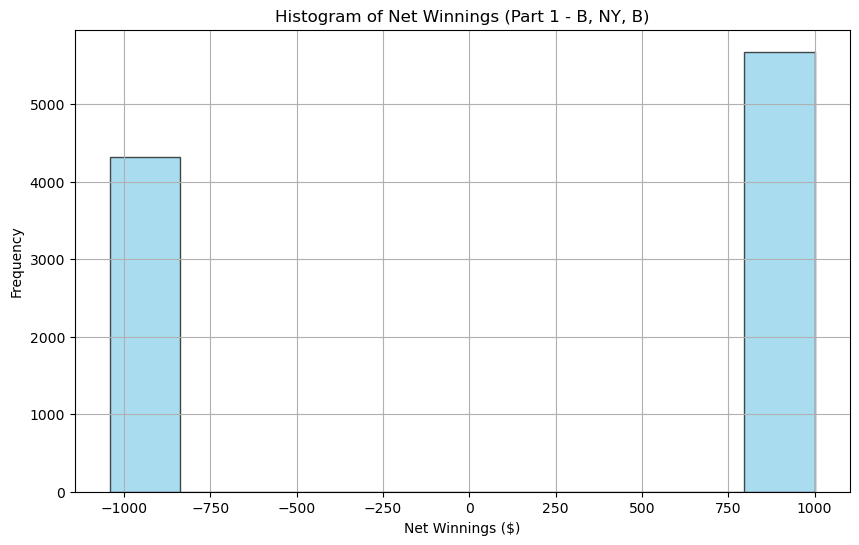

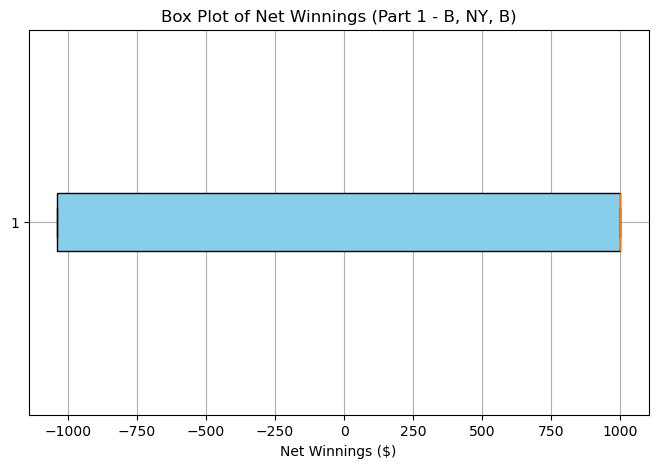

In [184]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(outcomes_part1, bins=10, color='cornflowerblue', edgecolor='black')
plt.title('Histogram - Part 1 (B, NY, B)')
plt.xlabel('Net Winnings ($)')
plt.ylabel('Frequency')



## Bigger picture of graphs of Part 1
game_order_part1 = ['B', 'NY', 'B']
outcomes_part1 = simulate_series(game_order_part1, wins_needed=2)
mean_sim_part1, std_sim_part1, conf_interval_part1 = analyze_and_visualize(outcomes_part1, "Part 1 - B, NY, B")

### Part 2 : New York, Boston, New York

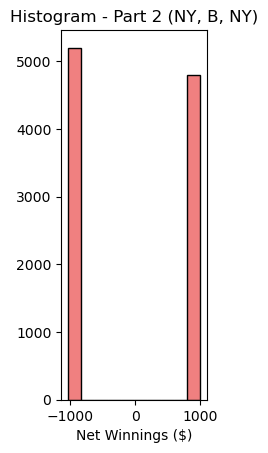

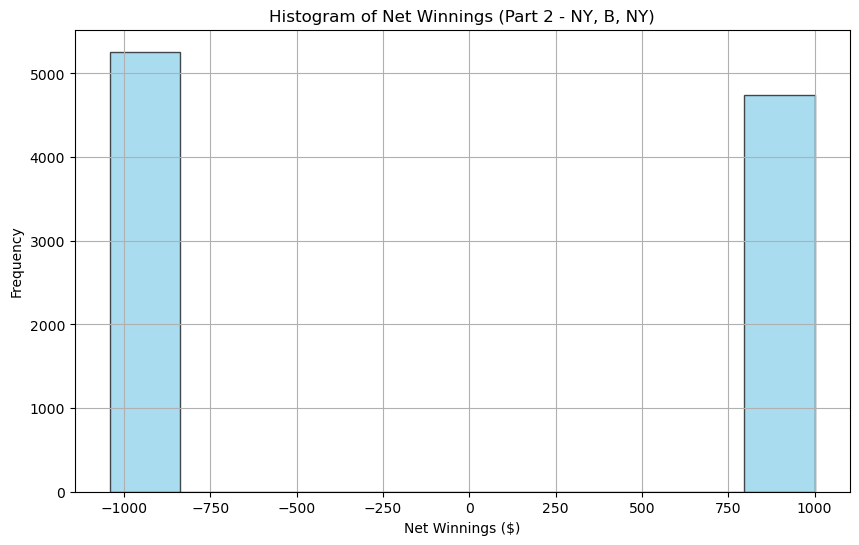

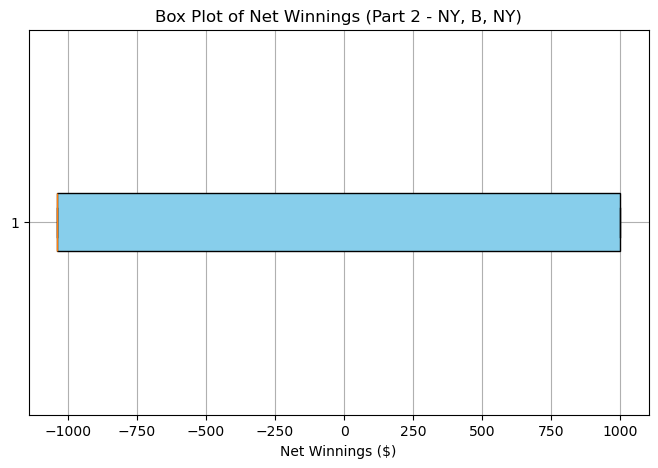

In [187]:
plt.subplot(1, 3, 2)
plt.hist(outcomes_part2, bins=10, color='lightcoral', edgecolor='black')
plt.title('Histogram - Part 2 (NY, B, NY)')
plt.xlabel('Net Winnings ($)')


## Bigger picture of Part 2
game_order_part2 = ['NY', 'B', 'NY']
outcomes_part2 = simulate_series(game_order_part2, wins_needed=2)
mean_sim_part2, std_sim_part2, conf_interval_part2 = analyze_and_visualize(outcomes_part2, "Part 2 - NY, B, NY")

### Part 3: Best-of-five (B,Ny,B,NY,B)

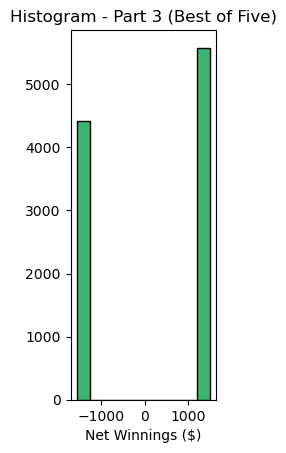

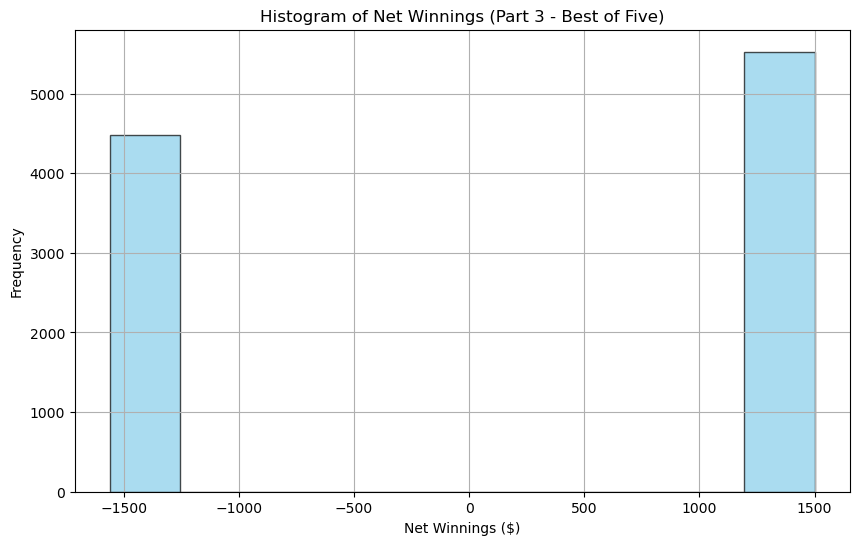

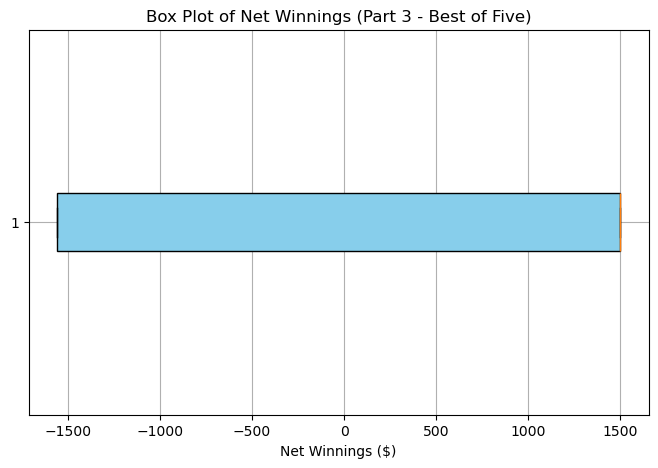

In [190]:
plt.subplot(1, 3, 3)
plt.hist(outcomes_part3, bins=10, color='mediumseagreen', edgecolor='black')
plt.title('Histogram - Part 3 (Best of Five)')
plt.xlabel('Net Winnings ($)')
plt.show()

## Bigger Picture of Part 3 Graphs
game_order_part3 = ['B', 'NY', 'B', 'NY', 'B']
outcomes_part3 = simulate_series(game_order_part3, wins_needed=3)
mean_sim_part3, std_sim_part3, conf_interval_part3 = analyze_and_visualize(outcomes_part3, "Part 3 - Best of Five")

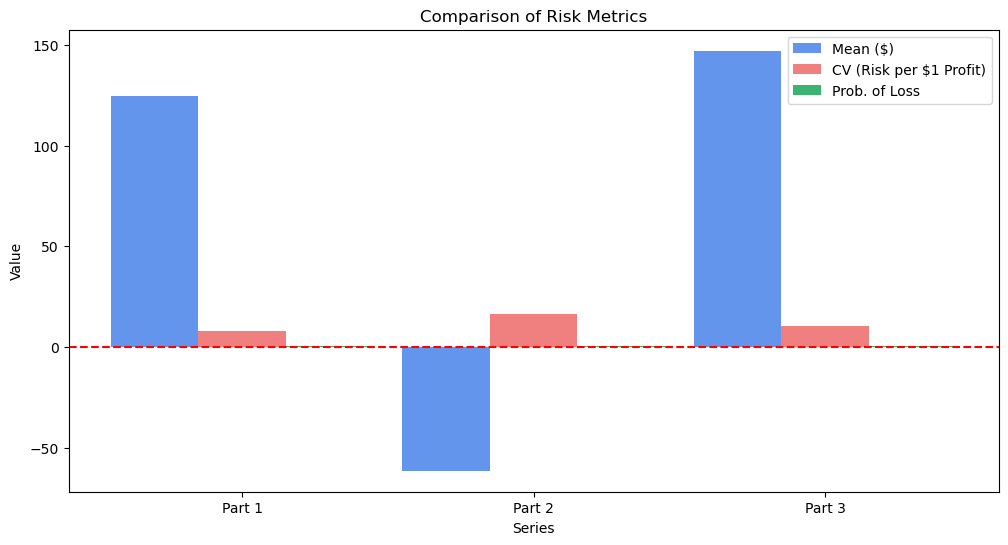

In [192]:
# Bar Plot - Risk Metrics Comparison
parts = ['Part 1', 'Part 2', 'Part 3']
means = [metrics_part1['Mean'], metrics_part2['Mean'], metrics_part3['Mean']]
cv_values = [metrics_part1['CV'], metrics_part2['CV'], metrics_part3['CV']]
prob_losses = [metrics_part1['Prob Loss'], metrics_part2['Prob Loss'], metrics_part3['Prob Loss']]

x = np.arange(len(parts))
width = 0.3

plt.figure(figsize=(12, 6))
plt.bar(x - width, means, width, label='Mean ($)', color='cornflowerblue')
plt.bar(x, cv_values, width, label='CV (Risk per $1 Profit)', color='lightcoral')
plt.bar(x + width, prob_losses, width, label='Prob. of Loss', color='mediumseagreen')
plt.axhline(0, color='red', linestyle='--')
plt.xticks(x, parts)
plt.title('Comparison of Risk Metrics')
plt.xlabel('Series')
plt.ylabel('Value')
plt.legend()
plt.show()

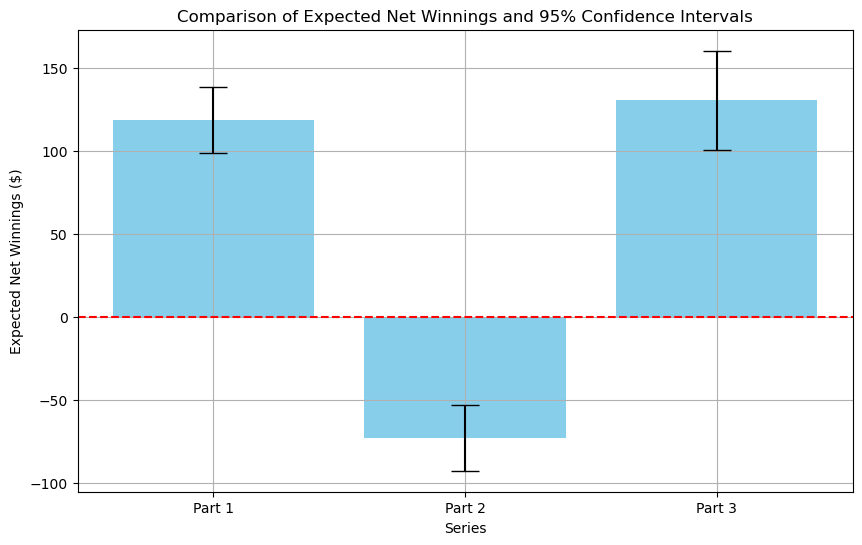

In [194]:

parts = ['Part 1', 'Part 2', 'Part 3']
means = [mean_sim_part1, mean_sim_part2, mean_sim_part3]
lower_bounds = [conf_interval_part1[0], conf_interval_part2[0], conf_interval_part3[0]]
upper_bounds = [conf_interval_part1[1], conf_interval_part2[1], conf_interval_part3[1]]

plt.figure(figsize=(10, 6))
plt.bar(parts, means, color='skyblue', yerr=[np.array(means) - np.array(lower_bounds), np.array(upper_bounds) - np.array(means)], capsize=10)
plt.axhline(0, color='red', linestyle='--')
plt.title('Comparison of Expected Net Winnings and 95% Confidence Intervals')
plt.xlabel('Series')
plt.ylabel('Expected Net Winnings ($)')
plt.grid(True)
plt.show()


### Compile Results

In [197]:

results = {
    "Part 1": {
        "Mean": mean_sim_part1,
        "Std Dev": std_sim_part1,
        "95% CI": conf_interval_part1
    },
    "Part 2": {
        "Mean": mean_sim_part2,
        "Std Dev": std_sim_part2,
        "95% CI": conf_interval_part2
    },
    "Part 3": {
        "Mean": mean_sim_part3,
        "Std Dev": std_sim_part3,
        "95% CI": conf_interval_part3
    }
}

In [199]:
print("Results Summary:")
for part, values in results.items():
    print(f"\n{part}:")
    print(f"  Mean Net Winnings: ${values['Mean']:.2f}")
    print(f"  Standard Deviation: ${values['Std Dev']:.2f}")
    print(f"  95% Confidence Interval: {values['95% CI']}")

Results Summary:

Part 1:
  Mean Net Winnings: $118.52
  Standard Deviation: $1010.60
  95% Confidence Interval: (98.70857401532916, 138.32342598467085)

Part 2:
  Mean Net Winnings: $-72.84
  Standard Deviation: $1018.68
  95% Confidence Interval: (-92.80179176657907, -52.870208233420925)

Part 3:
  Mean Net Winnings: $130.65
  Standard Deviation: $1521.62
  95% Confidence Interval: (100.82682380607267, 160.47317619392734)
